<h2>Simulation of Gravitational Binary System</h2>

This notebook is created to simulate the motion of a binary system in 2D dimension (assuming two objects are orbiting around each other in the same plane. 

In [246]:
# import the modulus required
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

<h3>Part (a): Python class of two body system</h3>

I create a python class called TwoBody_Grav to solve the binary problem for gravitational attraction between two bodies in Cartesian coordinate. 

In [247]:
class TwoBody_Grav():
    """
    The motions of a binary system with gravitational attraction between two bodies in 2 dimension Cartesian 
    coordinate. Several algorithms for integration of ordinary differential equations are now available. 
    
    
    Parameters
    ----------
    m1: float
        mass of the first object
    m2: float
        mass of the second object
    G: float
        gravitational constant
    AU: float
        astronomical unit
    daysec:
        seconds of a day
        
    Method
    ------
    df_dt: return the right side of the differential equations
        
    """
    
    def __init__(self, m1=2.0e30, m2=4.0e30, G=6.67e-11, AU=1.5e11, daysec=24.*60*60):
        self.m1 = m1
        self.m2 = m2
        self.G = G
        self.AU = AU
        self.daysec = daysec
        self.gravconst = G*m1*m2
    
    def df_dt(self, t_pts, f):
        '''
        input function f and return the right side of the differential equation
        '''
        x1 = f[0]
        y1 = f[1]
        vx1 = f[2]
        vy1 = f[3]
        x2 = f[4]
        y2 = f[5]
        vx2 = f[6]
        vy2 = f[7]
        
        r1 = np.array([x1, y1])
        r2 = np.array([x2, y2])
        v1 = np.array([vx1, vy1])
        v2 = np.array([vx2, vy2])
    
        dr = np.sqrt((x1-x2)**2+(y1-y2)**2)
        
        dr1_dt = v1
        dr2_dt = v2
        
        dv1_dt = self.G*self.m2*(r2-r1)/dr**3
        dv2_dt = self.G*self.m1*(r1-r2)/dr**3
        
        return [dr1_dt[0], dr1_dt[1], dv1_dt[0], dv1_dt[1], 
                dr2_dt[0], dr2_dt[1], dv2_dt[0], dv2_dt[1]]
        
    
    def solve_ode(self, t_pts, f0, abserr=1.0e-9, relerr=1.0e-9):
        '''
        numerically solve the differential equation
        '''
        solution = solve_ivp(self.df_dt, (t_pts[0], t_pts[-1]), 
                             f0, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        trajectory = solution.y
        return trajectory

<h3>Test Trajectories with different initial conditions</h3>

I use the initial conditions that the center of mass is always in the origin. 

In [248]:
# for easier demonstration, I use one for all parameters
m1= 1.
m2= 1.
G=1.
AU=1.
daysec=1. 

In [249]:
# Set up initial conditions
x1_0 = 1.
y1_0 = 1.

vx1_0 = -1.
vy1_0 = 1.

x2_0 = -(m1/m2)*x1_0
y2_0 = -(m1/m2)*y1_0

vx2_0 = -(m1/m2)*vx1_0
vy2_0 = -(m1/m2)*vy1_0

In [250]:
# set up time
t0 = 0.0
t_final = daysec*100
dt = 0.01*daysec
t_pts = np.arange(t0, t_final, dt)

In [251]:
ob1 = TwoBody_Grav(m1=m1, m2=m2, G=G, AU=AU, daysec=daysec)

In [252]:
f0 = np.array([x1_0, y1_0, vx1_0, vx2_0, x2_0, y2_0, vx2_0, vy2_0])
solution = ob1.solve_ode(t_pts, f0)

In [253]:
x1 = solution[0]
y1 = solution[1]
vx1 = solution[2]
vy1 = solution[3]
x2 = solution[4]
y2 = solution[5]
vx2 = solution[6]
vy2 = solution[7]

Text(0.5, 1.0, 'Two Body System under Gravitational Attraction')

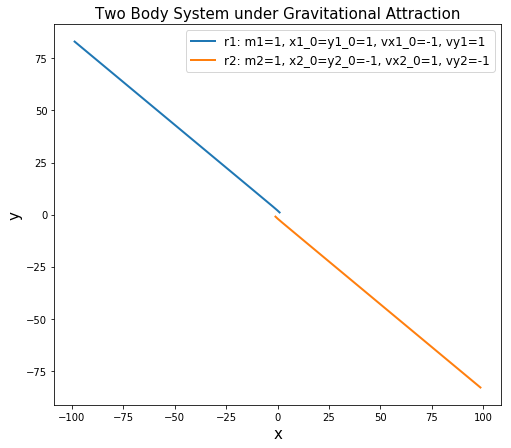

In [254]:
plt.figure(figsize=(8,7))
fontsize=15
plt.plot(x1, y1, linewidth=2.0, label='r1: m1=1, x1_0=y1_0=1, vx1_0=-1, vy1=1')
plt.plot(x2, y2, linewidth=2.0, label='r2: m2=1, x2_0=y2_0=-1, vx2_0=1, vy2=-1')
plt.xlabel(r'x', fontsize=fontsize)
plt.ylabel(r'y', fontsize=fontsize)
plt.legend(fontsize=12)
plt.title(r'Two Body System under Gravitational Attraction', fontsize=fontsize)

<h4>Comments:</h4>

As we see above, the initial position of m1 and m2 are opposite to each other (center of mass at origin). Since m1 and m2 have equal mass, they rotate aroud the center of mass with equal speed. 


<h3>Part (b): When m2 >> m1 </h3>

I set m1=0 (m2=1 still) to show that the problem reduces to the orbits considered in class.

In [268]:
# for easier demonstration, I use one for all parameters
m1= 0.
m2= 1.
G=1.
AU=1.
daysec=1. 

In [269]:
# Set up initial conditions
x1_0 = 1.
y1_0 = 1.

vx1_0 = -1
vy1_0 = 1.

x2_0 = -(m1/m2)*x1_0
y2_0 = -(m1/m2)*y1_0

vx2_0 = -(m1/m2)*vx1_0
vy2_0 = -(m1/m2)*vy1_0

In [270]:
# set up time
t0 = 0.0
t_final = daysec*100
dt = 0.01*daysec
t_pts = np.arange(t0, t_final, dt)
ob1 = TwoBody_Grav(m1=m1, m2=m2, G=G, AU=AU, daysec=daysec)

In [271]:
f0 = np.array([x1_0, y1_0, vx1_0, vx2_0, x2_0, y2_0, vx2_0, vy2_0])
solution = ob1.solve_ode(t_pts, f0)
x1 = solution[0]
y1 = solution[1]
vx1 = solution[2]
vy1 = solution[3]
x2 = solution[4]
y2 = solution[5]
vx2 = solution[6]
vy2 = solution[7]

Text(0.5, 1.0, 'Two Body System under Gravitational Attraction')

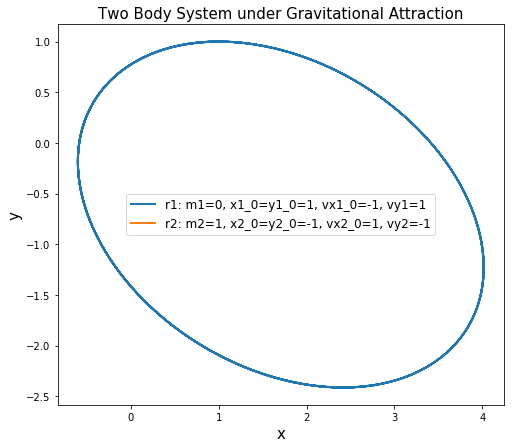

In [275]:
plt.figure(figsize=(8,7))
fontsize=15
plt.plot(x1, y1, linewidth=2.0, label='r1: m1=0, x1_0=y1_0=1, vx1_0=-1, vy1=1')
plt.plot(x2, y2, linewidth=2.0, label='r2: m2=1, x2_0=y2_0=-1, vx2_0=1, vy2=-1')
plt.xlabel(r'x', fontsize=fontsize)
plt.ylabel(r'y', fontsize=fontsize)
plt.legend(fontsize=12)
plt.title(r'Two Body System under Gravitational Attraction', fontsize=fontsize)

<h4>Comments:</h4>

The orbit of m2 now become a ellipse , which is the oribt described in the class (m1 at the origin, and m2 centers around it in the orbit of ellipse). 